In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import statistics as sts
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
url=r"C:\Users\DELL\Desktop\insrance.csv"
cost=pd.read_csv(url)
cost

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1341,50.0,male,30.970,3.0,no,northwest,10600.54830
1342,18.0,female,31.920,0.0,no,northeast,2205.98080
1343,18.0,female,36.850,0.0,no,southeast,1629.83350
1344,21.0,female,25.800,0.0,no,southwest,2007.94500


In [3]:
cost.isna().sum()

age         5
sex         6
bmi         6
children    6
smoker      6
region      6
charges     8
dtype: int64

In [4]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1341 non-null   float64
 1   sex       1340 non-null   object 
 2   bmi       1340 non-null   float64
 3   children  1340 non-null   float64
 4   smoker    1340 non-null   object 
 5   region    1340 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.7+ KB


In [5]:
cost.interpolate(inplace=True)
cost

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1341,50.0,male,30.970,3.0,no,northwest,10600.54830
1342,18.0,female,31.920,0.0,no,northeast,2205.98080
1343,18.0,female,36.850,0.0,no,southeast,1629.83350
1344,21.0,female,25.800,0.0,no,southwest,2007.94500


In [6]:
cost.isna().sum()

age         0
sex         6
bmi         0
children    0
smoker      6
region      6
charges     0
dtype: int64

In [7]:
cost.fillna(method='ffill', inplace=True)
cost

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1341,50.0,male,30.970,3.0,no,northwest,10600.54830
1342,18.0,female,31.920,0.0,no,northeast,2205.98080
1343,18.0,female,36.850,0.0,no,southeast,1629.83350
1344,21.0,female,25.800,0.0,no,southwest,2007.94500


In [8]:
cost.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

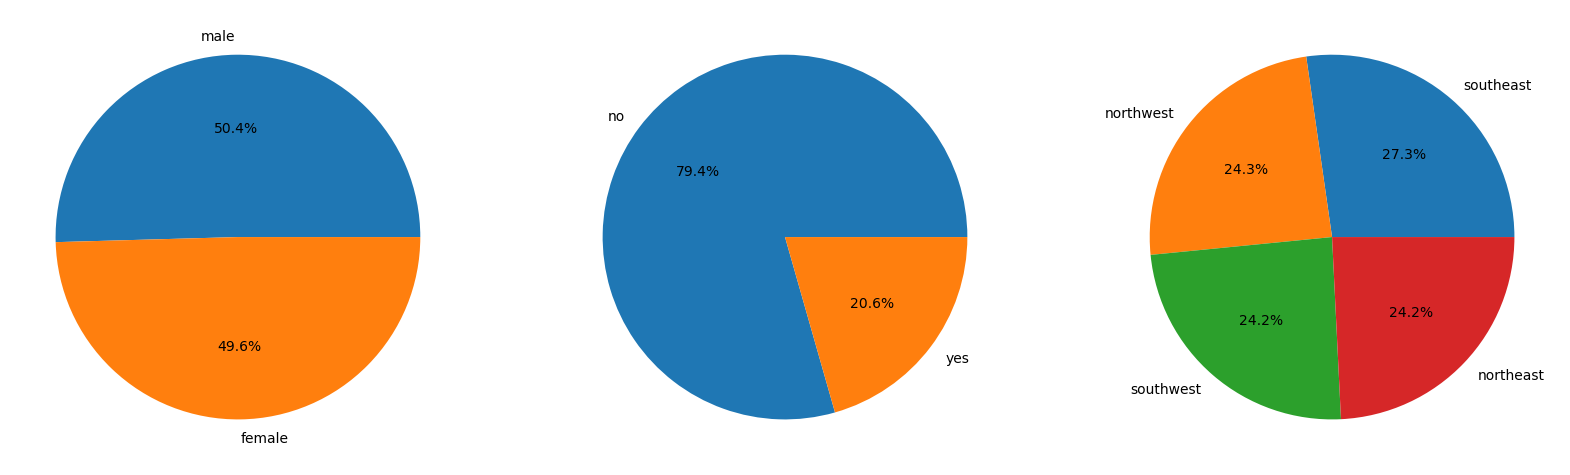

In [9]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = cost[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()


# In the above plots it says that the sex and region are almost equally divided but the Smokers ration is 80:20

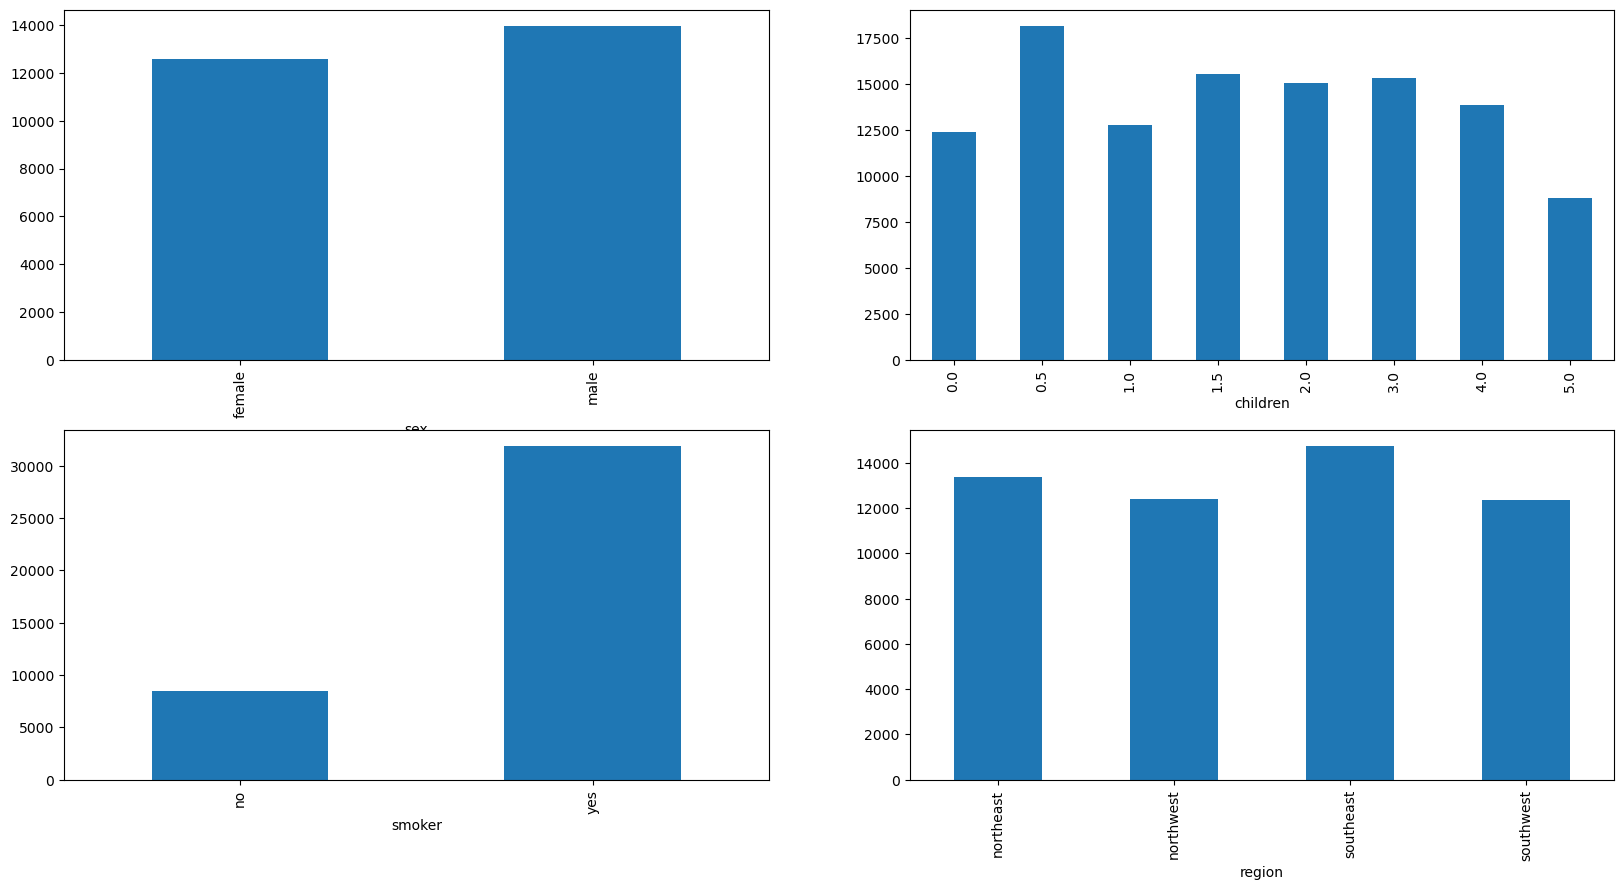

In [10]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    cost.groupby(col).mean()['charges'].plot.bar()
plt.show()


# In the above plots we can observe that the charges for males is more as compared to female.
# Here smokers are charged more premium than the non-smokers
# Premium charges are almost same for region wise 

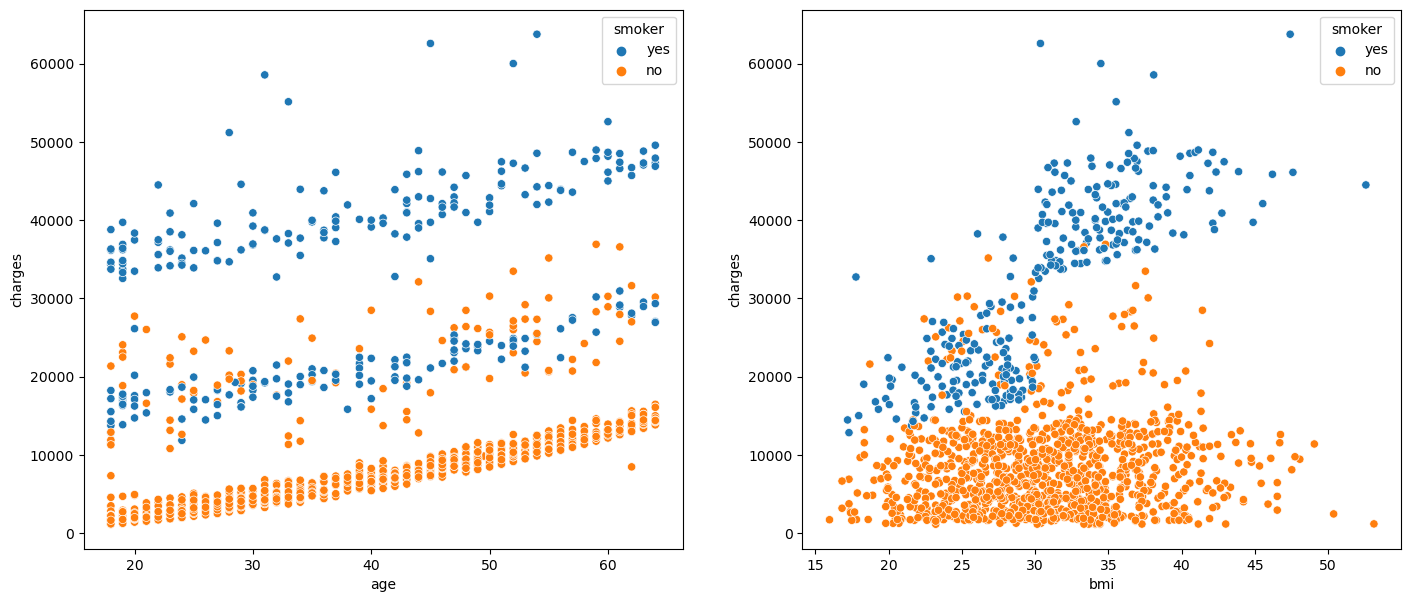

In [11]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=cost, x=col,
                y='charges',
                hue='smoker')
plt.show()


# Here we can observe that smokers are charged with higher premium 

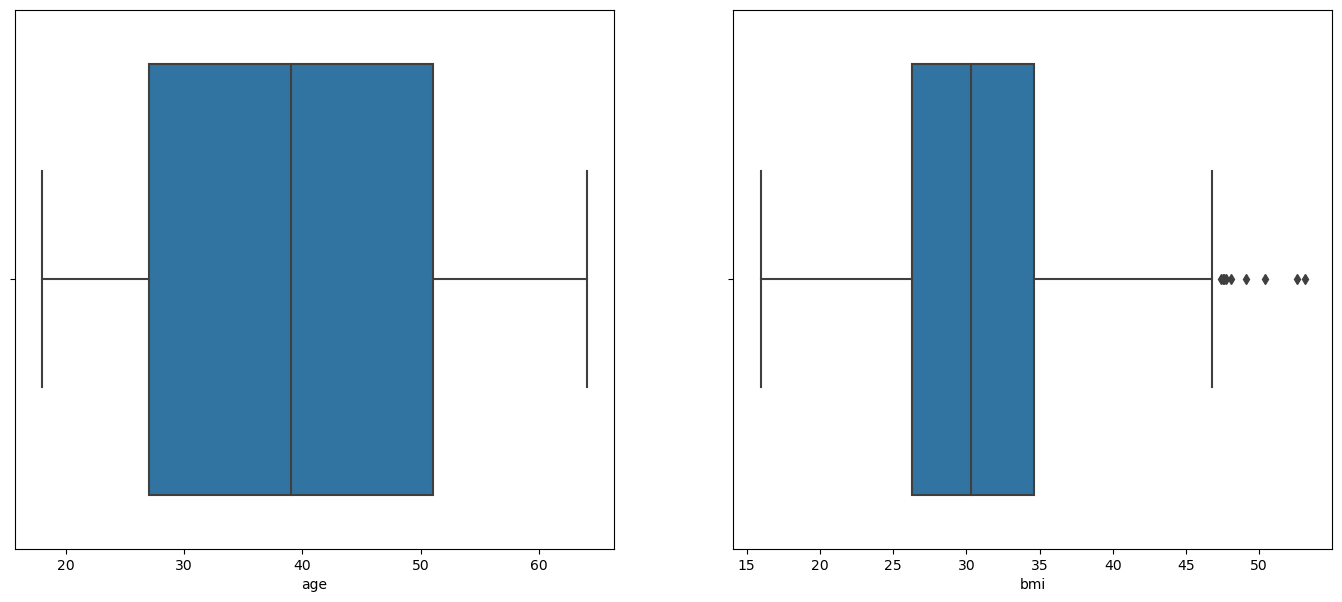

In [12]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(cost[col])
plt.show()


# Here in the box plot we can see the outliers in the BMI column

In [13]:
cost.shape, cost[cost['bmi']<45].shape


((1346, 7), (1326, 7))

#Now lets over write the dataset without the outliers

In [14]:
cost1= cost[cost['bmi']<45]
cost1

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1341,50.0,male,30.970,3.0,no,northwest,10600.54830
1342,18.0,female,31.920,0.0,no,northeast,2205.98080
1343,18.0,female,36.850,0.0,no,southeast,1629.83350
1344,21.0,female,25.800,0.0,no,southwest,2007.94500


#As we can see previously there were 1346 rows now its reduced to 1326 that means the outliers are removed from the dataset

In [15]:
for col in cost1.columns:
    if cost1[col].dtype == object:
        le = LabelEncoder()
        cost1[col] = le.fit_transform(cost1[col])


#The above step is done to convert the labels into a numeric form so as to machine-readable form 

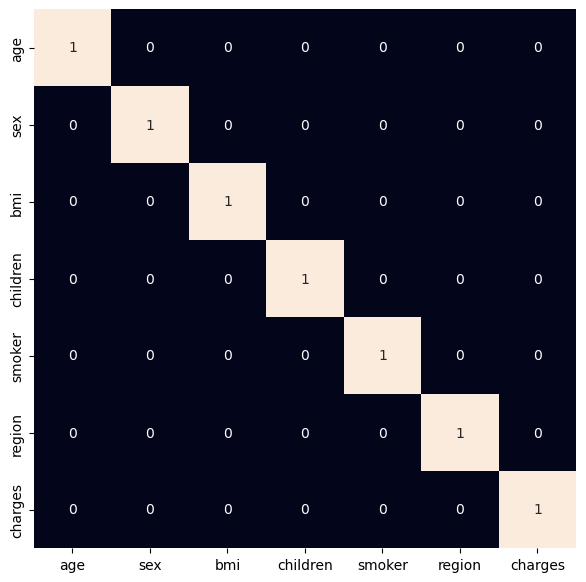

In [16]:
plt.figure(figsize=(7, 7))
sns.heatmap(cost1.corr() > 0.8,
        annot=True,
        cbar=False)
plt.show()


# The above heatmap shows that there are no highly correlated features in it.

# Model Building

In [17]:
cost2=linear_model.LinearRegression()
cost2.fit(cost1[['age','sex','bmi','children','smoker','region']],cost1.charges)

LinearRegression()

In [18]:
cost2.coef_ # ([ m1, m2, m3, m4, m5, m6)] respectively

array([  257.37510507,   -55.03290946,   351.66773022,   507.76470292,
       23358.10722297,  -380.51865906])

In [21]:
cost2.intercept_

-12316.674496613427

In [23]:
cost2.predict([[26,1,32,1,0,2]]) #[(m1*age)+(m2*sex)+(m3*bmi)+(m4*children)+(m5*smoker)+(m6*region)]+b

array([5320.14007743])

In [24]:
cost2.predict([[37,0,22,3,1,1.123]])

array([29396.97333332])